<a href="https://colab.research.google.com/github/sarbbb/information_sciences/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

In [38]:
data = pd.read_csv("sample_data/iris.csv")
data.sample(n=2)

,sepal.length,sepal.width,petal.length,petal.width,variety
102,7.1,3.0,5.9,2.1,Virginica
41,4.5,2.3,1.3,0.3,Setosa


In [39]:
df_norm = data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=2)

,sepal.length,sepal.width,petal.length,petal.width
80,0.333333,0.166667,0.474576,0.416667
11,0.138889,0.583333,0.101695,0.041667


In [40]:
target = data[['variety']].replace(['Setosa','Versicolor','Virginica'],[0,1,2])
target.sample(n=5)

,variety
78,1
9,0
10,0
4,0
15,0


In [41]:
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,sepal.length,sepal.width,petal.length,petal.width,variety
87,0.555556,0.125000,0.576271,0.500000,1
42,0.027778,0.500000,0.050847,0.041667,0
59,0.250000,0.291667,0.491525,0.541667,1
73,0.500000,0.333333,0.627119,0.458333,1
97,0.527778,0.375000,0.559322,0.500000,1


In [42]:
train,test=train_test_split(df, test_size=0.3)

In [43]:
train_X=train[['sepal.length','sepal.width','petal.length','petal.width']]
train_y=train.variety

In [44]:
test_X=test[['sepal.length','sepal.width','petal.length','petal.width']]
test_y=test.variety

In [45]:
# 老師的多層感知器(MLP) => hidden_layer_sizes=(3,3)
# 兩層，第一層3個隱藏單元，第二層隱藏3個單元
clf=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,3), random_state=1)
clf.fit(train_X, train_y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1,
              solver='lbfgs')

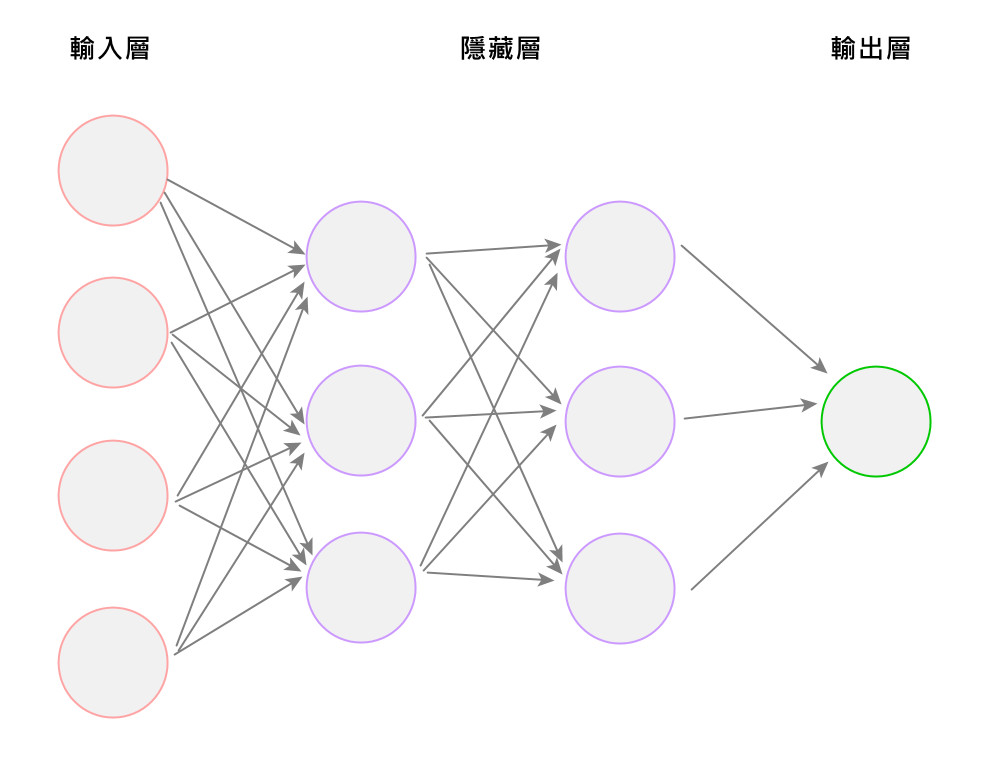

In [46]:
prediction = clf.predict(test_X)
print(prediction)

[2 0 0 1 2 2 2 2 2 0 2 2 1 2 2 1 2 0 1 2 1 2 0 0 1 0 0 0 0 0 0 0 2 1 1 1 1
 0 1 1 1 1 1 2 2]


In [47]:
print(test_y.values)

[2 0 0 1 2 2 2 2 2 0 2 2 1 2 2 1 2 0 1 2 1 2 0 0 1 0 0 0 0 0 0 0 2 1 1 1 1
 0 1 1 1 2 2 2 2]


In [48]:
print('The accuracy of the Multi-layer Perceptron is:\033[0;32;43m',metrics.accuracy_score(prediction,test_y),'\033[0m')

The accuracy of the Multi-layer Perceptron is: 0.9555555555555556 


<font color=blue>1）hidden_layer_sizes=(100,)：tuple，同時指定隱藏層層數+每層單元數。比如（10,20）兩層隱藏層，第一層10個隱藏單元，第二層20個隱藏單元；默認值為一層隱藏層100個隱藏單元</font>

In [49]:
# 多層感知器(MLP) => hidden_layer_sizes=3
# 一層，第一層3個隱藏單元
clf1=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3), random_state=1, tol=1e-4)
clf1.fit(train_X, train_y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=3, random_state=1, solver='lbfgs')

In [50]:
prediction1 = clf1.predict(test_X)
print(prediction1,'\n')

print(test_y.values,'\n')

print('The accuracy of the Multi-layer Perceptron is(hidden_layer_sizes=3):\033[0;32;43m',metrics.accuracy_score(prediction1,test_y),'\033[0m')

[2 0 0 1 2 2 2 2 2 0 2 2 1 2 2 1 2 0 1 2 1 2 0 0 1 0 0 0 0 0 0 0 2 1 1 1 1
 0 1 1 1 2 1 2 2] 

[2 0 0 1 2 2 2 2 2 0 2 2 1 2 2 1 2 0 1 2 1 2 0 0 1 0 0 0 0 0 0 0 2 1 1 1 1
 0 1 1 1 2 2 2 2] 

The accuracy of the Multi-layer Perceptron is(hidden_layer_sizes=3): 0.9777777777777777 


<font color=blue>2) activation="relu"：隱藏層的啟動函數，可選為{'identity', 'logistic', 'tanh', 'relu'}，分別對應：{ f(x) = x ，f(x) = 1 / (1 + exp(-x))，f(x) = tanh(x)，f(x) = max(0, x)}；預設值是'relu'</font>

In [51]:
# 多層感知器(MLP)
# 隱藏層的啟動函數用'identity'
clf2=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,3), random_state=1, activation='identity', tol=1e-4)
clf2.fit(train_X, train_y)

MLPClassifier(activation='identity', alpha=1e-05, hidden_layer_sizes=(3, 3),
              random_state=1, solver='lbfgs')

In [52]:
prediction2 = clf2.predict(test_X)
print(prediction2,'\n')

print(test_y.values,'\n')

print('The accuracy of the Multi-layer Perceptron is(activation="identity"):\033[0;32;43m',metrics.accuracy_score(prediction2,test_y),'\033[0m')

[2 0 0 1 2 2 2 2 2 0 2 2 1 2 2 1 2 0 1 2 1 2 0 0 1 0 0 0 0 0 0 0 2 1 1 1 1
 0 1 1 1 2 1 2 2] 

[2 0 0 1 2 2 2 2 2 0 2 2 1 2 2 1 2 0 1 2 1 2 0 0 1 0 0 0 0 0 0 0 2 1 1 1 1
 0 1 1 1 2 2 2 2] 

The accuracy of the Multi-layer Perceptron is(activation="identity"): 0.9777777777777777 


In [53]:
# 多層感知器(MLP)
# 隱藏層的啟動函數用'logistic'
clf3=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,3), random_state=1, activation='logistic', tol=1e-4)
clf3.fit(train_X, train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(3, 3),
              random_state=1, solver='lbfgs')

In [54]:
prediction3 = clf3.predict(test_X)
print(prediction3,'\n')

print(test_y.values,'\n')

print('The accuracy of the Multi-layer Perceptron is(activation="logistic"):\033[0;32;43m',metrics.accuracy_score(prediction3,test_y),'\033[0m')

[2 0 0 1 2 2 2 2 1 0 2 1 1 2 2 1 2 0 1 2 1 2 0 0 1 0 0 0 0 0 0 0 2 1 1 1 1
 0 1 1 1 1 1 2 2] 

[2 0 0 1 2 2 2 2 2 0 2 2 1 2 2 1 2 0 1 2 1 2 0 0 1 0 0 0 0 0 0 0 2 1 1 1 1
 0 1 1 1 2 2 2 2] 

The accuracy of the Multi-layer Perceptron is(activation="logistic"): 0.9111111111111111 


In [55]:
# 多層感知器(MLP) => hidden_layer_sizes=3
# 隱藏層的啟動函數用'tanh'
clf4=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,3), random_state=1, activation='tanh', tol=1e-4)
clf4.fit(train_X, train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(3, 3),
              random_state=1, solver='lbfgs')

In [56]:
prediction4 = clf4.predict(test_X)
print(prediction4,'\n')

print(test_y.values,'\n')

print('The accuracy of the Multi-layer Perceptron is(activation="tanh"):\033[0;32;43m',metrics.accuracy_score(prediction4,test_y),'\033[0m')

[2 0 0 1 2 2 2 2 2 0 2 2 1 2 2 1 2 0 1 2 1 2 0 0 1 0 0 0 0 0 0 0 2 1 1 1 1
 0 1 1 1 1 1 2 2] 

[2 0 0 1 2 2 2 2 2 0 2 2 1 2 2 1 2 0 1 2 1 2 0 0 1 0 0 0 0 0 0 0 2 1 1 1 1
 0 1 1 1 2 2 2 2] 

The accuracy of the Multi-layer Perceptron is(activation="tanh"): 0.9555555555555556 


<font color=blue>3) solver='adam'：參數的優化演算法，可選為{'lbfgs', 'sgd', 'adam'}，分別對應{擬牛頓法，隨機梯度下降，基於隨機梯度下降的自我調整}的具體實現演算法</font>

In [57]:
# 多層感知器(MLP) 
# 參數的優化演算法用solver='sgd'
# 參數更新時的學習率，在solver='sgd'時有效，選用{'constant'}，常數即=初始學習率
# 初始學習率learning_rate_init設0.001


clf5=MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(3,3), random_state=1, learning_rate="constant",learning_rate_init=0.001, tol=1e-4)
clf5.fit(train_X, train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1,
              solver='sgd')

In [58]:
prediction5 = clf5.predict(test_X)
print(prediction5,'\n')

print(test_y.values,'\n')

print('The accuracy of the Multi-layer Perceptron is(solver="sgd",max_iter=200):\033[0;32;43m',metrics.accuracy_score(prediction5,test_y),'\033[0m')

[2 1 1 2 2 2 2 2 2 1 2 2 1 2 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1
 1 1 1 1 2 2 2 2] 

[2 0 0 1 2 2 2 2 2 0 2 2 1 2 2 1 2 0 1 2 1 2 0 0 1 0 0 0 0 0 0 0 2 1 1 1 1
 0 1 1 1 2 2 2 2] 

The accuracy of the Multi-layer Perceptron is(solver="sgd",max_iter=200): 0.6 


In [59]:
# 多層感知器(MLP) 
# 參數的優化演算法用solver='sgd'
# 參數更新時的學習率，在solver='sgd'時有效，選用{'constant'}，常數即=初始學習率
# 初始學習率learning_rate_init設0.001
# 最大迭代數設max_iter為10000   => 迭代數如果太少，MLP沒有收斂準確度會差  => 會出警告

clf6=MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(3,3), random_state=1, learning_rate="constant",learning_rate_init=0.001,max_iter=10000,tol=1e-4)
clf6.fit(train_X, train_y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), max_iter=10000,
              random_state=1, solver='sgd')

In [60]:
prediction6 = clf6.predict(test_X)
print(prediction6,'\n')

print(test_y.values,'\n')

print('The accuracy of the Multi-layer Perceptron is(solver="sgd",max_iter=10000):\033[0;32;43m',metrics.accuracy_score(prediction6,test_y),'\033[0m')

[2 0 0 1 2 2 2 2 2 0 2 2 1 2 2 1 2 0 1 2 1 2 0 0 1 0 0 0 0 0 0 0 2 1 1 1 1
 0 1 1 1 2 2 2 2] 

[2 0 0 1 2 2 2 2 2 0 2 2 1 2 2 1 2 0 1 2 1 2 0 0 1 0 0 0 0 0 0 0 2 1 1 1 1
 0 1 1 1 2 2 2 2] 

The accuracy of the Multi-layer Perceptron is(solver="sgd",max_iter=10000): 1.0 


In [61]:
# 多層感知器(MLP) 
# 參數的優化演算法用solver='sgd'
# 參數更新時的學習率，在solver='sgd'時有效，選用{'invscaling'}，逐漸降低
# 初始學習率learning_rate_init設0.001
# 最大迭代數設max_iter為10000   => 迭代數如果太少，MLP沒有收斂準確度會差  => 會出警告

clf7=MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(3,3), random_state=1, learning_rate="invscaling",learning_rate_init=0.001,max_iter=10000,tol=1e-4)
clf7.fit(train_X, train_y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3),
              learning_rate='invscaling', max_iter=10000, random_state=1,
              solver='sgd')

In [62]:
prediction7 = clf7.predict(test_X)
print(prediction7,'\n')

print(test_y.values,'\n')

print('The accuracy of the Multi-layer Perceptron is(solver="sgd",max_iter=10000):\033[0;32;43m',metrics.accuracy_score(prediction7,test_y),'\033[0m')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1] 

[2 0 0 1 2 2 2 2 2 0 2 2 1 2 2 1 2 0 1 2 1 2 0 0 1 0 0 0 0 0 0 0 2 1 1 1 1
 0 1 1 1 2 2 2 2] 

The accuracy of the Multi-layer Perceptron is(solver="sgd",max_iter=10000): 0.28888888888888886 


In [63]:
# 多層感知器(MLP)
# 參數的優化演算法用solver='adam'
# 最大迭代數設max_iter為2500   => 迭代數如果太少，MLP沒有收斂準確度會差  => 會出警告
clf9=MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(3,3), random_state=1,max_iter=2500,tol=1e-4)
clf9.fit(train_X, train_y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), max_iter=2500,
              random_state=1)

In [64]:
prediction9 = clf9.predict(test_X)
print(prediction6,'\n')

print(test_y.values,'\n')

print('The accuracy of the Multi-layer Perceptron is(solver="adam",max_iter=2500):\033[0;32;43m',metrics.accuracy_score(prediction9,test_y),'\033[0m')

[2 0 0 1 2 2 2 2 2 0 2 2 1 2 2 1 2 0 1 2 1 2 0 0 1 0 0 0 0 0 0 0 2 1 1 1 1
 0 1 1 1 2 2 2 2] 

[2 0 0 1 2 2 2 2 2 0 2 2 1 2 2 1 2 0 1 2 1 2 0 0 1 0 0 0 0 0 0 0 2 1 1 1 1
 0 1 1 1 2 2 2 2] 

The accuracy of the Multi-layer Perceptron is(solver="adam",max_iter=2500): 1.0 
